In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import wrangle

ModuleNotFoundError: No module named 'env'

In [ ]:
df = pd.read_csv("zillow.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# assuming null value for pool means no pool
df.poolcnt.fillna(0, inplace = True)
# assuming null calie for fireplace means no null
df.fireplacecnt.fillna(0, inplace = True)

In [ ]:
# drop features/rows with more than 50% null values
df = wrangle.drop_50_pct_null(df)

In [ ]:
# create dummy variables and add them to the df
dummy_df =  pd.get_dummies(df['fips'])
dummy_df.columns = ['in_los_angeles', 'in_orange_county', 'in_ventura']
df = pd.concat([df, dummy_df], axis=1)
df['fips'] = df.fips.replace('6,037.00', 6037)
df['fips'] = df.fips.replace('6,059.00', 6059)
df['fips'] = df.fips.replace('6,111.00', 6111)

In [ ]:
#create new feature house_age
today = pd.to_datetime('today')
df['house_age'] = today.year - df['yearbuilt']
df['tax_rate'] = df.taxvaluedollarcnt / df.taxamount

df['acres'] = df.lotsizesquarefeet/43560

In [ ]:
df['level_of_log_error'] = pd.cut(df.logerror, 
                            bins = [-5,-1,-.15,.15,1,5],
                            labels = ['Way Under', 'Under', 'Accurate', 'Over', 'Way Over'])

In [ ]:
df.acres.value_counts()

In [ ]:
#drop features
df = df.drop(['propertycountylandusecode', 'propertyzoningdesc', 
             'heatingorsystemdesc', 'transactiondate',
              'finishedsquarefeet12', 'id', 'censustractandblock',
             'rawcensustractandblock', 'calculatedbathnbr', 
             'assessmentyear', 'propertylandusedesc'], axis=1)

In [ ]:
#rename features
df = df.rename(columns={'heatingorsystemtypeid':'has_heating_system', 
                       'bathroomcnt':'bathrooms', 'bedroomcnt':'bedrooms', 
                       'buildingqualitytypeid':'quality',
                       'calculatedfinishedsquarefeet':'square_feet', 
                       'fullbathcnt':'full_bathrooms',
                       'lotsizesquarefeet':'lot_square_feet', 
                       'propertylandusetypeid':'land_type',
                       'regionidcity':'city', 'regionidcounty':'county',
                       'regionidzip':'zip_code', 'roomcnt':'room_count',
                       'structuretaxvaluedollarcnt':'structure_tax_value',
                       'taxvaluedollarcnt':'tax_value', 
                       'landtaxvaluedollarcnt':'land_tax_value', 
                       'fireplacecnt':'has_fireplace',
                       'poolcnt':'has_pool'})

In [ ]:
# assuming that null means no heating bc it is southern CA
df.has_heating_system.fillna('13', inplace = True)
# change has_heating_system to binary
df['has_heating_system'] = df.has_heating_system.replace([2.0, 7.0, 24.0, 6.0, 20.0, 13.0, 18.0, 1.0, 10.0, 11.0], 1)
df['has_heating_system'] = df.has_heating_system.replace('13', '0')
df['has_heating_system'] = (df['has_heating_system'] == True ).astype(int)
# all of these are 1 unit counts
df.unitcnt.fillna(1, inplace = True)
df['unitcnt'] = df.unitcnt.replace([2.0, 3.0, 4.0, 6.0], 1)
# change has_fireplace to a binary
df['has_fireplace'] = df.has_fireplace.replace([2.0, 3.0, 4.0, 5.0], 1)
df['has_fireplace'] = df.has_fireplace.replace(0.0, 0)
#fix has_pool to int
df['has_pool'] = df.has_fireplace.replace(1.0, 1)
df['has_pool'] = df.has_fireplace.replace(0.0, 0)
# fix unitcnt to int
df['unitcnt'] = (df['unitcnt'] == True ).astype(int)

In [ ]:
df.acres.value_counts()

In [ ]:
# replacing null in quality feature with its median range (6)
df.quality.fillna(6.0, inplace = True)
# replacing null in square_feet with its median
df.lot_square_feet.fillna(7313, inplace = True)
 # replacing null in quality feature with its median
df.square_feet.fillna(1511, inplace = True)
 # replacing null in quality feature with its median
df.full_bathrooms.fillna(2, inplace = True)
 # replacing null in quality feature with its median
df.yearbuilt.fillna(1970, inplace = True)
 # replacing null in quality feature with its median
df.structure_tax_value.fillna(134871, inplace = True)
 # replacing null in quality feature with its median
df.house_age.fillna(51, inplace = True)
 # replacing null in quality feature with its median
df.city.fillna(25218, inplace = True)
 # replacing null in quality feature with its median
df.zip_code.fillna(96410, inplace = True)

In [ ]:
#drop remaining null values
df = df.dropna()

In [ ]:
# change la, oc, and vent into int
df['in_los_angeles'] = (df['in_los_angeles'] == True ).astype(int)
df['in_orange_county'] = (df['in_orange_county'] == True ).astype(int)
df['in_ventura'] = (df['in_ventura'] == True ).astype(int)

In [ ]:
# set index as parcelid
df = df.set_index('parcelid')

In [ ]:
df.acres.value_counts()

In [ ]:
# finish dropping
df = df.drop(['Unnamed: 0', 'yearbuilt'], axis=1)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.acres.value_counts()

In [ ]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

- Take care of outliers for:
    - square feet
    - tax rate


## Take care of Tax Value Outliers

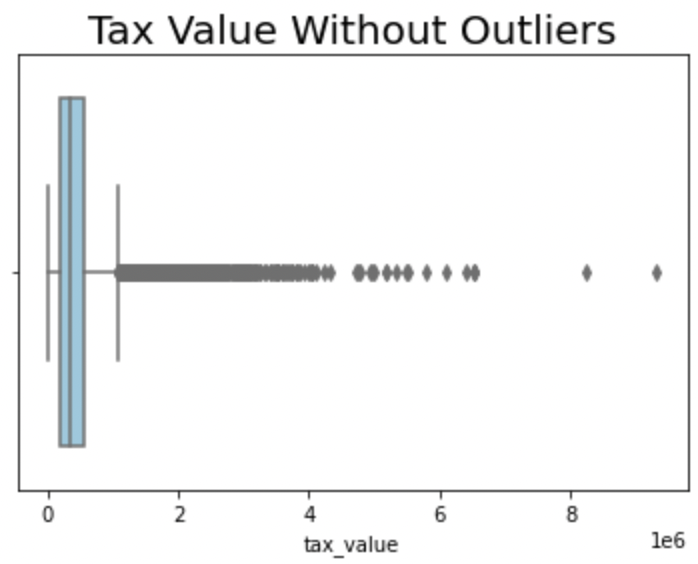

In [ ]:
# Let's use IQR for the entire dataset
q1 = df.tax_value.quantile(.25)
q3 = df.tax_value.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

In [ ]:
# lets give us everyhting less than the upper bound
df = df[df.tax_value < upper_bound]
# since lower bound is negative there is no need to include it
# now the shape
df.shape
# went from 64,068 rows to 62,132

In [ ]:
plt.title("Tax Value Without Outliers", size=20, color='black')
sns.boxplot(df.tax_value, color='skyblue')

### For the function

In [ ]:
df = df[df.tax_value < 1153326.5]

# Handle Square Feet Outliers

In [ ]:
plt.title("Square Feet With Outliers", size=20, color='black')
sns.boxplot(df.square_feet, color='skyblue')

In [ ]:
# Let's use IQR for the entire dataset
q1 = df.square_feet.quantile(.25)
q3 = df.square_feet.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

In [ ]:
# lets give us everyhting less than the upper bound
df = df[df.square_feet < 6000]
# since lower bound is negative there is no need to include it
df.shape
# went from 62,132 rows to 59,554

In [ ]:
plt.title("Square Feet Without Outliers", size=20, color='black')
sns.boxplot(df.square_feet, color='skyblue')

In [ ]:
df = df[df.square_feet < 6000.0]

# Handle Acres Outliers

plt.title("Acres With Outliers", size=20, color='black')
sns.boxplot(df.acres, color='skyblue')

# Let's use IQR for the entire dataset
q1 = df.acres.quantile(.25)
q3 = df.acres.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

df.acres.max()

# lets give us everyhting less than the upper bound
df = df[df.acres < upper_bound]
# since lower bound is negative there is no need to include it
df.shape
# went from 59,554 rows to 51,207

df.acres.max()

plt.title("Acres Without Outliers", size=20, color='black')
sns.boxplot(df.acres, color='skyblue')

df = df[df.acres < 0.665426997245179]

# Handle Outliers of Logerror

In [ ]:
plt.title("Logerror With Outliers", size=20, color='black')
sns.boxplot(df.logerror, color='skyblue')

In [ ]:
# Let's use IQR for the entire dataset
q1 = df.logerror.quantile(.25)
q3 = df.logerror.quantile(.75)
iqr = q3 - q1

# IQR has a parameter that is a 'multiplier'
multiplier = 3
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

print(f'q1 = :', q1) 
print(f'q3 = :', q3)
print(f'IQR = :', iqr)
print("-------------------------------------")
print(f'Upper Bound = :', upper_bound) 
print(f'Lower Bound = :', lower_bound) 

In [ ]:
# lets give us everyhting less than the upper bound
df = df[df.logerror < upper_bound]
# lowerbound
df = df[df.logerror > lower_bound]
df.shape
# went from 59,554 rows to 51,207

In [ ]:
plt.title("Acres Without Outliers", size=20, color='black')
sns.boxplot(df.acres, color='skyblue')

In [ ]:
df.isnull().sum()

## Time to bin

In [ ]:
df.square_feet.isnull().sum()

In [ ]:
df.square_feet.max()

In [ ]:
# bin the square feet
df['square_feet_bins'] = pd.cut(df.square_feet, 
                        bins = [0,500,1000,1500,2000,2500,3000,3500,4000,6000],
                        labels = [1, 2, 3, 4, 5, 6, 7, 8,9])
df['square_feet_bins'] = (df['square_feet_bins']).astype(int)

In [ ]:
# bin lot square feet
df['lot_sqft_bins'] = pd.cut(df.lot_square_feet, 
                        bins = [0,10000,20000,30000,40000,50000,60000,70000,10000000],
                        labels = [0, 1, 2, 3, 4, 5, 6, 7])
df['lot_sqft_bins'] = (df['lot_sqft_bins']).astype(int)

In [ ]:
sns.histplot(data=df, x="acres", color='skyblue', ec='black')

In [ ]:
df.acres.min()

In [ ]:
df.acres.max()

In [ ]:
# bin acres
df['acre_bins'] = pd.cut(df.acres, 
                        bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                        labels = [0, 1, 2, 3, 4, 5, 6])
df['acre_bins'] = (df['acre_bins']).astype(int)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [ ]:
train, validate, test = wrangle.split_zillow(df)

In [ ]:
train.head()

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [ ]:
X_train.head()

In [ ]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [ ]:
train.head()

In [ ]:
df.info()

In [ ]:
sns.pairplot(data = train, hue = 'level_of_log_error', 
             x_vars = ['logerror', 'square_feet_bins', 'lot_sqft_bins', 'acre_bins', 
                       'bedrooms', 'bathrooms'],
             y_vars = ['logerror', 'has_fireplace', 'has_heating_system', 'latitude', 
                       'longitude', 'has_pool'], palette='viridis')

In [ ]:
train.level_of_log_error.value_counts()

'Way Under' = -4.656000000000001, -0.0331

'Under' =  -0.0331, -0.00366

'Accurate'= -0.00366, 0.0171

'Over' = 0.0171, 0.0496

'Way Over' = 0.0496, 5.263

In [ ]:
train.acre_bins.value_counts()

In [ ]:
train.square_feet_bins.value_counts()

In [ ]:
df.to_csv("clean_zillow.csv")

In [ ]:
train.to_csv("train_zillow.csv")